In [1]:
import os, json
import numpy as np

# walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]
# for dirpath, dirnames, filenames in walk:
#     if "testingSetScores.json" in filenames:
#         data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
#         # sort data
#         data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
#         deltas = []
#         for k in data:
#             initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
#             optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
#             delta = optimized_prompt_score - initial_prompt_score
#             deltas.append(delta)
            
#         print(deltas)
#         avg_change = sum(deltas) / len(deltas)
#         print(f"Avg change: {dirpath}: {avg_change}")
        
        
with open("testingSetScores.json", "r") as f:
    data = json.load(f)
    deltas = []
    for k in data:
        initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
        optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
        delta = optimized_prompt_score - initial_prompt_score
        deltas.append(delta)
        
    print(deltas)
    avg_change = np.mean(deltas)
    std = np.std(deltas)
    ci = 1.96 * std / np.sqrt(len(deltas))
    print(f"Avg change: {avg_change}")
    print(f"Std: {std}")
    print(f"95% CI: {ci}")
    
    # Plot the points on a vertical line with the confidence interval
    # import matplotlib.pyplot as plt
    # xs = np.zeros(len(deltas))
    # plt.figure()
    # plt.errorbar(xs, deltas, yerr=ci, fmt='o')
    # plt.show()

[6.181859061992075, -0.004994822781995367, 44.387804166009055, 13.600096547852523, 52.870421488299726, 11.702199717579045, 1.4469405804486009, 8.760850474942842, 0.37403265504443794, 2.436525300976813, 5.287771976134827, 2.4916471922283563, 30.931344246118243, 56.49045466320857, 32.37683909795463, 3.0950952297505125, 6.8828556275569, 8.890162711563505, 52.981484501016205, 4.40506329609952, 5.023773296552221, 9.539068069510485, 10.673716071891334, 57.20231082416855, 60.393340157894116, 9.528436204699418, 43.1288743191445, 7.139692115764586, 37.86842532362381, 42.188641330247194, 39.55560744728217, 2.172006224894403, 0.7050965935905111, 5.395271539302112, 18.9157141900981, -0.10028542282558561]
Avg change: 19.303281722162012
Std: 19.93834131731176
95% CI: 6.513191496988508


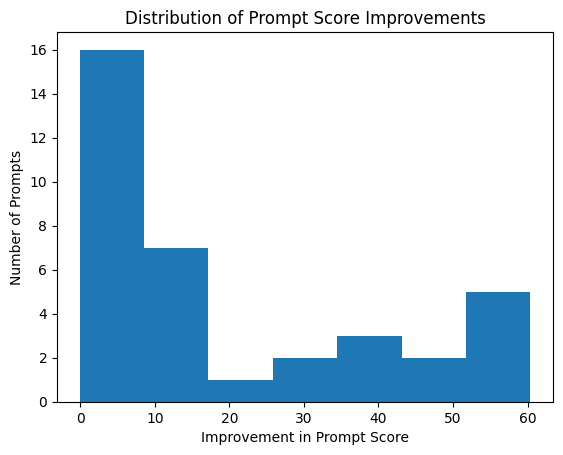

In [2]:
import matplotlib.pyplot as plt
plt.hist(deltas, bins=7)
plt.xlabel("Improvement in Prompt Score")
plt.ylabel("Number of Prompts")
plt.title("Distribution of Prompt Score Improvements")
plt.show()

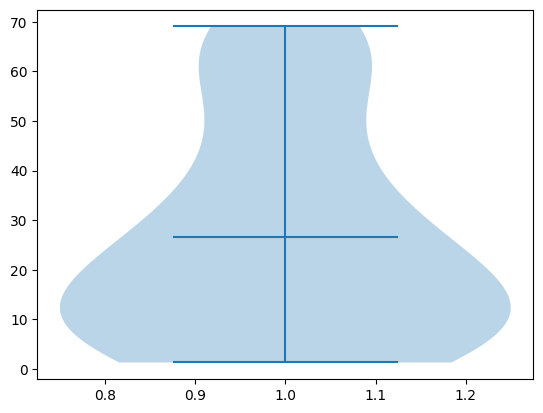

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(deltas, showmeans=True)
plt.show()